# Procesamiento de imágenes · Tarea 1

In [1]:
!pip install opencv-python

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.dpi'] = 200

In [4]:
img_path = 'plane.jpg'
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)[:, :, ::-1]

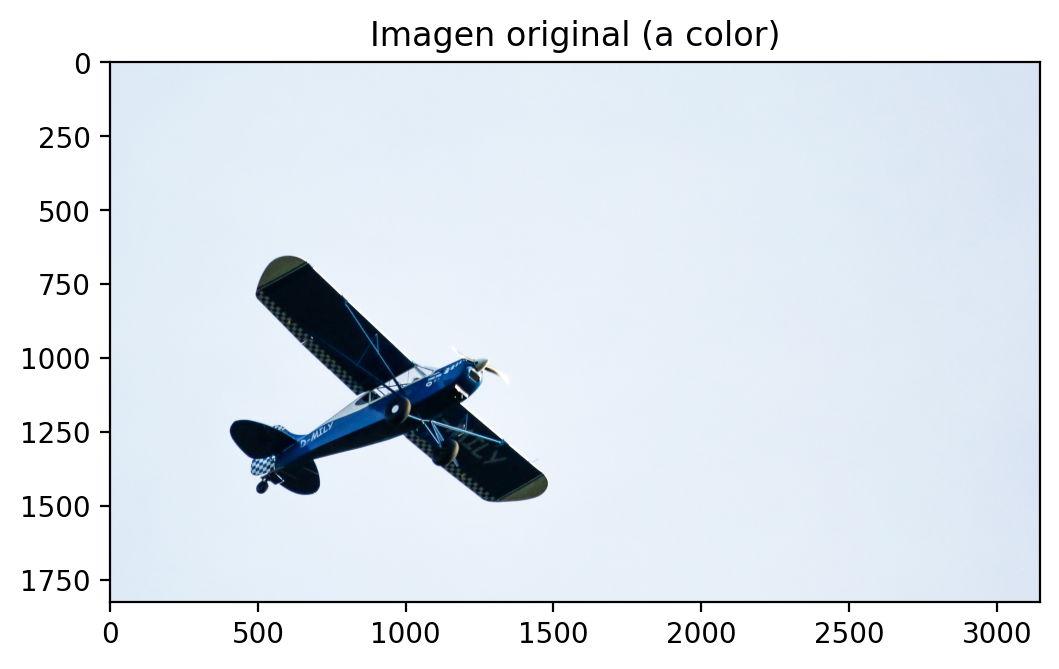

In [16]:
plt.imshow(img_color)
plt.title('Imagen original (a color)')
plt.show()

Las dimensiones de la imagen son (1825, 3147)
La clase de la imagen es <class 'numpy.ndarray'>
La clase de los pixeles es uint8
La intensidad más baja de la imagen es 0
La intensidad más alta de la imagen es 255


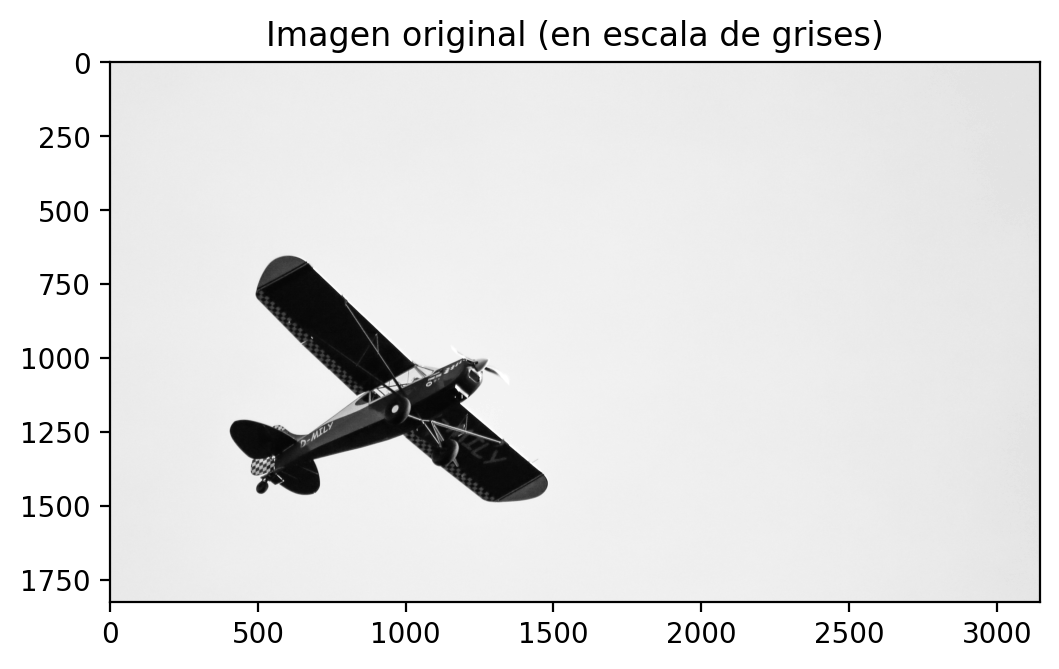

In [31]:
print(f'Las dimensiones de la imagen son {img_gray.shape}')
print(f'La clase de la imagen es {type(img_gray)}')
print(f'La clase de los pixeles es {img_gray.dtype}')
print(f'La intensidad más baja de la imagen es {img_gray.min()}')
print(f'La intensidad más alta de la imagen es {img_gray.max()}')

plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original (en escala de grises)')
plt.show()

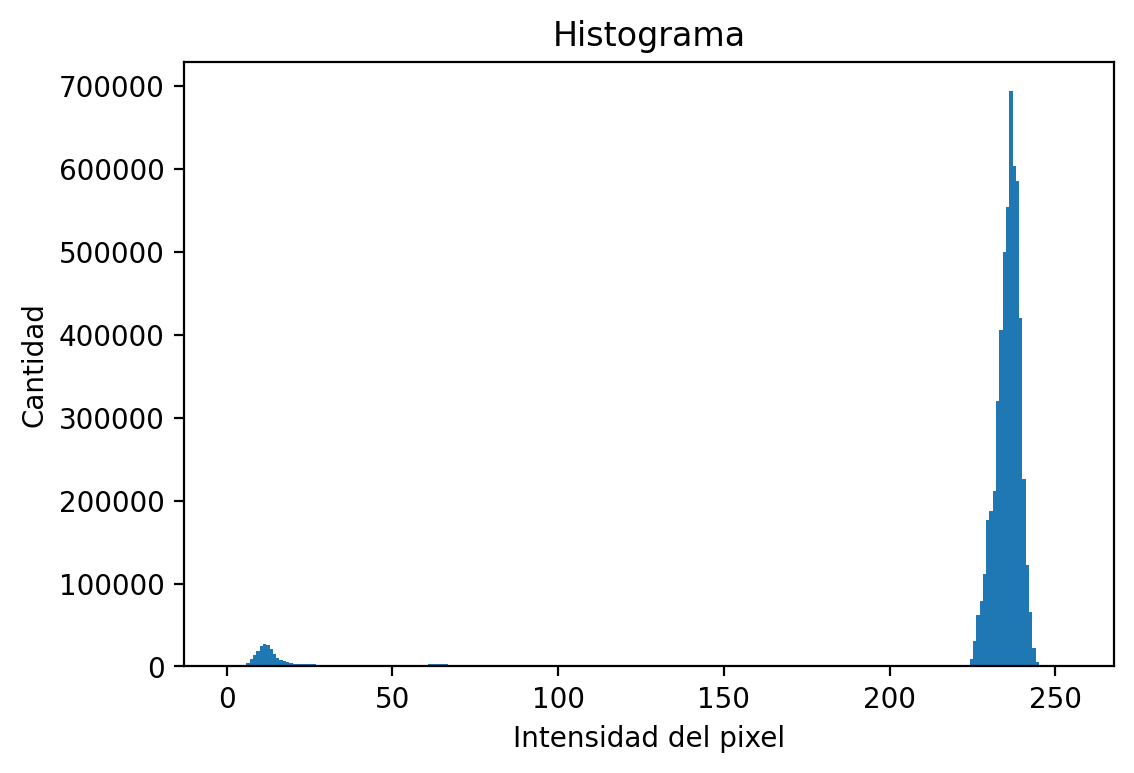

In [22]:
plt.hist(img_gray.ravel(), 256)
plt.title('Histograma')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Cantidad')
plt.show()

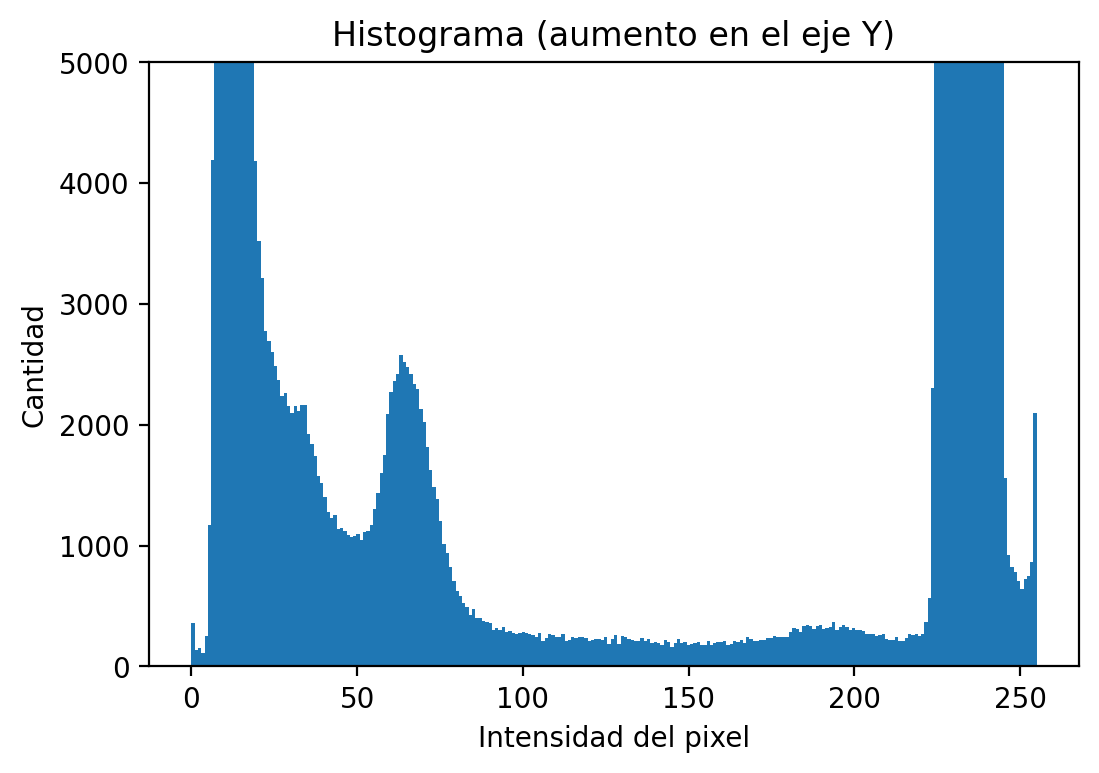

In [24]:
plt.hist(img_gray.ravel(), 256)
plt.title('Histograma (aumento en el eje Y)')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Cantidad')
plt.ylim(0, 5000)
plt.show()

In [25]:
threshold = 150
img_binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]

La clase de los pixeles es uint8
La intensidad más baja de la imagen es 0
La intensidad más alta de la imagen es 255


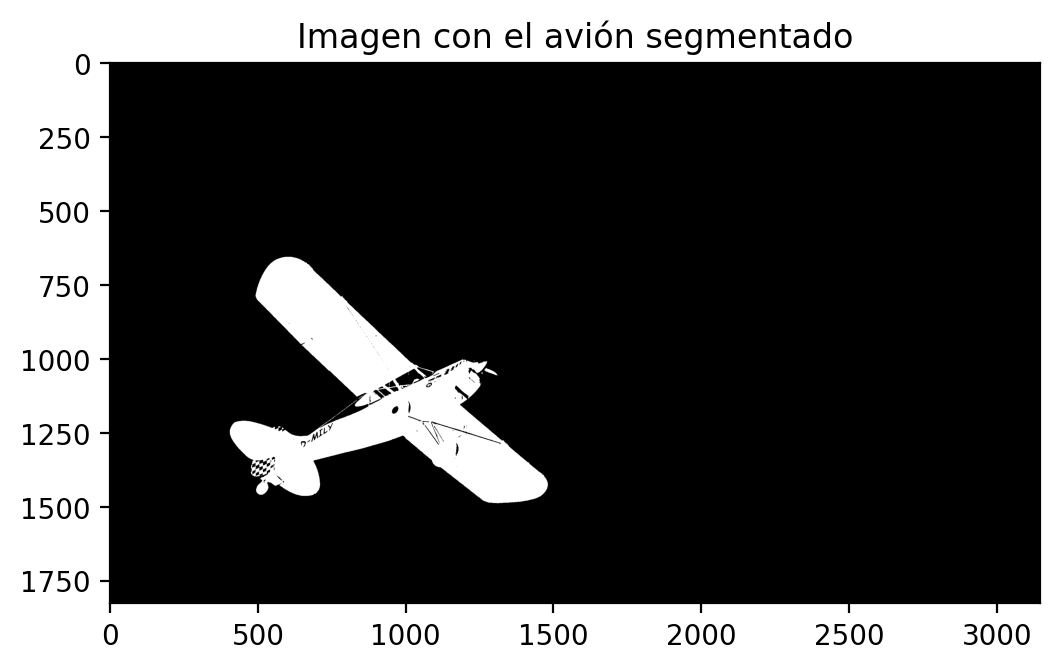

In [32]:
print(f'La clase de los pixeles es {img_binary.dtype}')
print(f'La intensidad más baja de la imagen es {img_binary.min()}')
print(f'La intensidad más alta de la imagen es {img_binary.max()}')

plt.imshow(img_binary, cmap='gray')
plt.title('Imagen binaria con el avión segmentado')
plt.show()

In [28]:
nonzero_pixels = np.count_nonzero(img_binary)
total_pixels = img_gray.shape[0] * img_gray.shape[1]
nonzero_percent = nonzero_pixels / total_pixels * 100
print(f'{nonzero_percent:.2f}% ({nonzero_pixels}/{total_pixels}) de los pixeles corresponden al avión')

5.62% (322577/5743275) de los pixeles corresponden al avión


Posición X: 405
Posición Y: 655
Ancho: 1075
Alto: 833


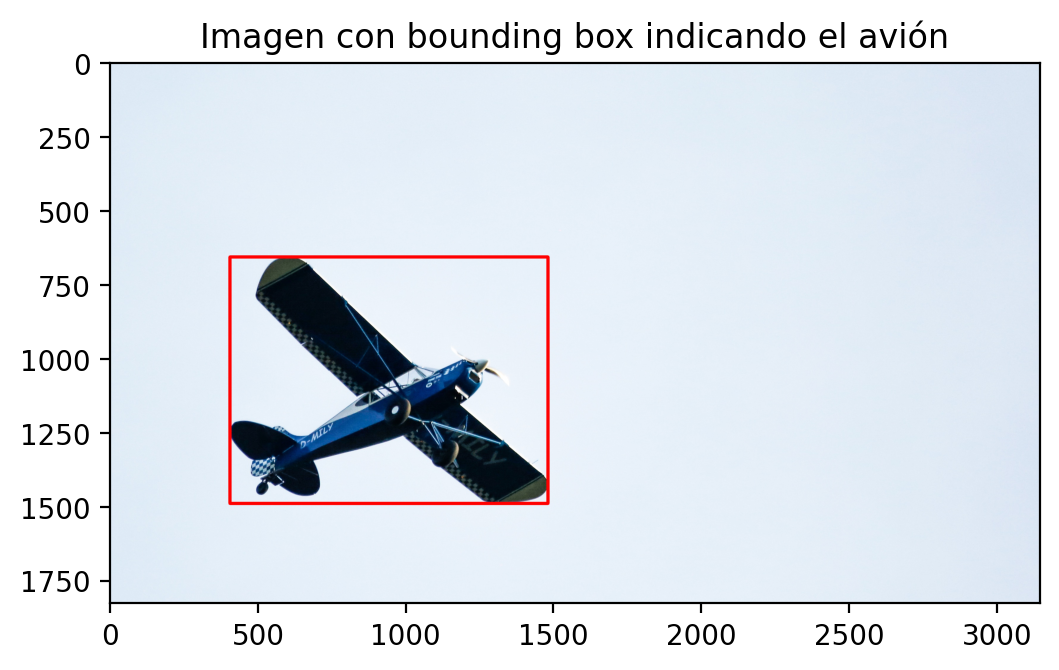

In [45]:
bbox_x, bbox_y, bbox_w, bbox_h = cv2.boundingRect(img_binary)
print(f'Posición X: {bbox_x}')
print(f'Posición Y: {bbox_y}')
print(f'Ancho: {bbox_w}')
print(f'Alto: {bbox_h}')

plt.imshow(cv2.rectangle(img_color.copy(), (bbox_x, bbox_y) ,(bbox_x + bbox_w, bbox_y + bbox_h), (255, 0, 0), 10))
plt.title('Imagen con bounding box indicando el avión')
plt.show()

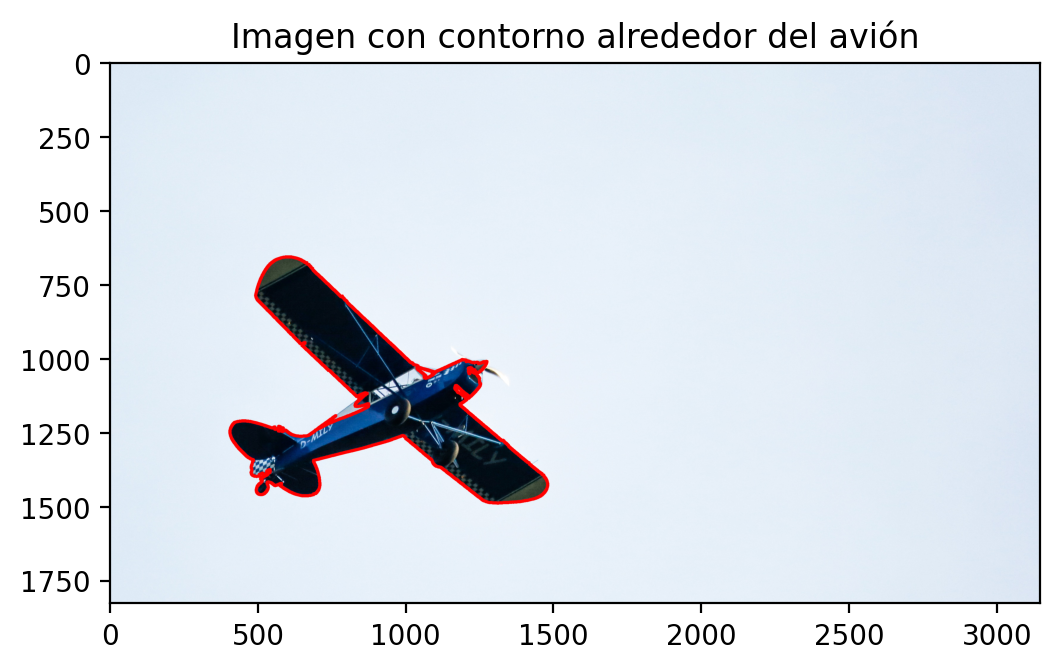

In [46]:
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(img_color.copy(), [contours[-1]], -1, (255, 0, 0), 10))
plt.title('Imagen con contorno alrededor del avión')
plt.show()

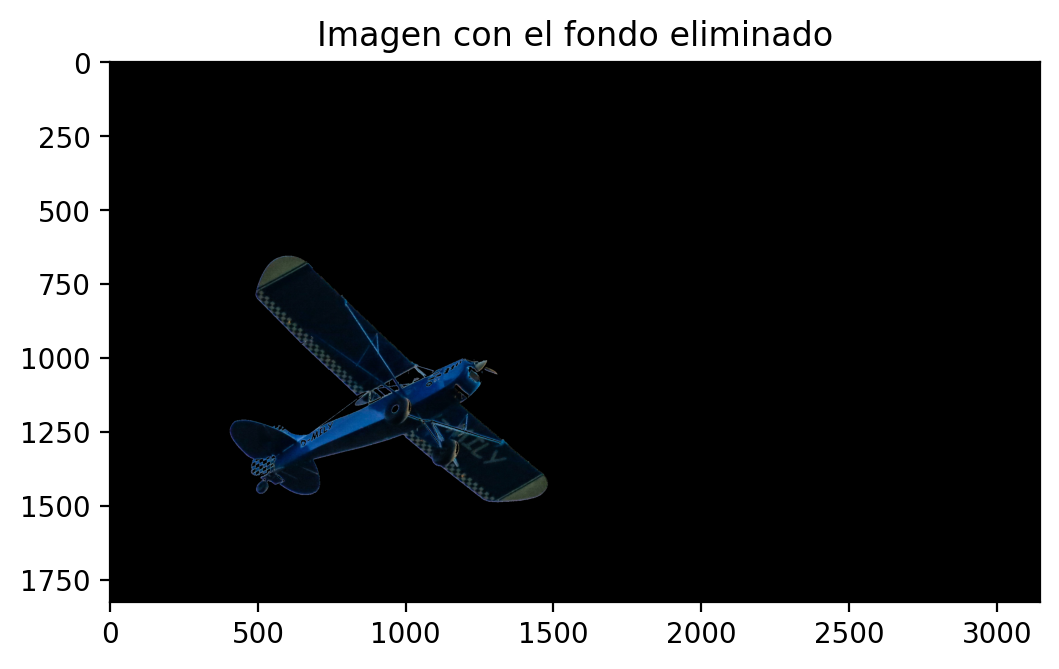

In [47]:
masked = cv2.bitwise_and(img_color, img_color, mask=img_binary)
plt.imshow(masked)
plt.title('Imagen con el fondo eliminado')
plt.show()